# Homework 6
## Problem 2.1 and 2.2
Repeat problem 1 for $z_A=0.30$

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

molFrac = np.linspace(0,1,9999)                                             #array of mol frac from 0,1

T = np.array([64.5,66,69.3,73.1,78,84.4,89.3,93.5,100])                     #temp data c
yA = np.array([1,.958,.87,.779,.665,.517,.365,.23,0])                       #sat vap
xA = np.array([1,.9,.7,.5,.3,.15,.08,.04,0])                                #sat liq

interpX = interp1d(xA,T,kind='cubic')                                                    #interpolated sat liq (T=f(x))
interpY = interp1d(yA,T,kind='cubic')                                                    #interpolated sat vap (T=f(y))
interpTx = interp1d(T,xA,kind='cubic')
interpTy = interp1d(T,yA,kind='cubic')


In [44]:
mix = 0.3                                                               #mix comp
Tdew = interpY(mix)                                                     #dew point temp at mix comp

TdewApprox = []                                                         #this loop finds the closest T in the interpolated data to the value of Tdew
for i in interpX(molFrac):
    if i <=Tdew and i >Tdew-0.1:
        TdewApprox.append(i)

xDew = molFrac[interpX(molFrac).tolist().index(max(TdewApprox))]        #comp of first drop
# print('T_dew =',Tdew)
# print('x_dew =',xDew)

Tbub = 78.0
ybub = 0.665

Following the same logic as problem 1, the dew point temperature is found when $y_A=0.30$ and the bubble point temperature is found when $x_A=0.30$. The composition of the first vapor bubble is $y_A$ at the bubble point temperature and the composition of the first droplet is $x_A$ at the dew point temperature.
</br></br>
The dew point temperature is about $91.3 \degree C$ and the composition of the first droplet is about $5.90$% methanol. The bubble point temperature is $78.0 \degree C$ and the composition of the first bubble is $66.5$%. Below is a graphical representation of the process.

''

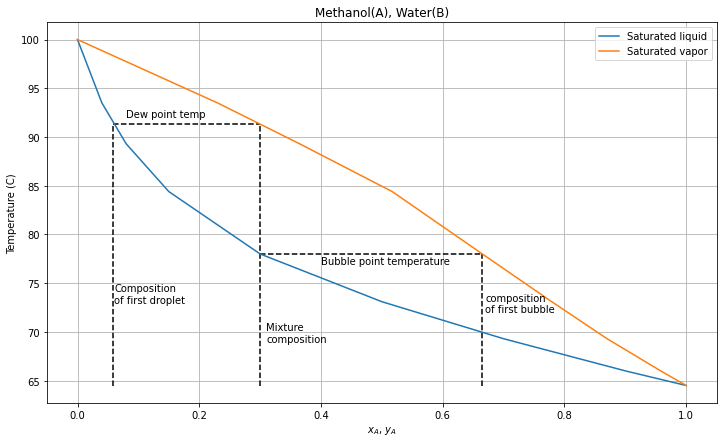

In [45]:
plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(mix,min(T),Tdew,linestyles='--',color='k')
plt.vlines(xDew,min(T),Tdew,linestyles='--',color='k')
plt.hlines(Tdew,xDew,mix,linestyles='--',color='k')
plt.hlines(Tbub,mix,ybub,linestyles='--',color='k')
plt.vlines(ybub,min(T),Tbub,linestyles='--',color='k')

plt.text(.06,73,'Composition\nof first droplet')
plt.text(.08,92,'Dew point temp')
plt.text(.31,69,'Mixture\ncomposition')
plt.text(.4,77,'Bubble point temperature')
plt.text(.67,72,'composition\nof first bubble')

plt.xlabel(r'$x_A$, $y_A$')
plt.ylabel('Temperature (C)')
plt.grid()
plt.title('Methanol(A), Water(B)')
plt.legend()
;


## Problem 2.3

For this problem, the inverse lever arm rule becomes
$$
0.20 = \frac{0.30-a}{c-a}
$$
where $a$ and $c$ are depicted in the plot below.

''

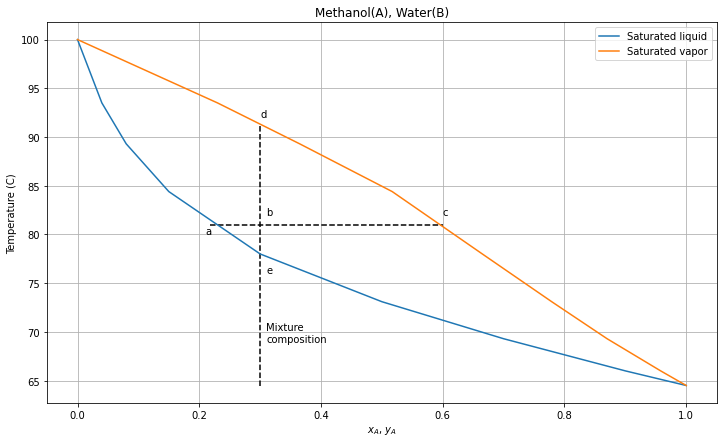

In [46]:
plt.figure(figsize=(12,7))
plt.plot(xA,T,label='Saturated liquid')
plt.plot(yA,T,label='Saturated vapor')

plt.vlines(mix,min(T),Tdew,linestyles='--',color='k')
plt.hlines(81,interpTx(81),interpTy(81),linestyles='--',color='k')


plt.text(.31,69,'Mixture\ncomposition')
plt.text(.21,80,'a')
plt.text(.31,82,'b')
plt.text(.6,82,'c')
plt.text(.3,92,'d')
plt.text(.31,76,'e')
plt.xlabel(r'$x_A$, $y_A$')
plt.ylabel('Temperature (C)')
plt.grid()
plt.title('Methanol(A), Water(B)')
plt.legend()

;


In [47]:
possibY = []                                                #loop to make array of possible y values
for i in range(len(molFrac)):
    if molFrac[i] < ybub and molFrac[i] > mix:
        possibY.append(molFrac[i])
possibY = np.array(possibY)
possibX = interpTx(interpY(possibY))                        #possible x values

In [51]:
sol = (mix-possibX)/(possibY-possibX)                       #solution to eq1
sol = sol.tolist()

for i in sol:                                               #loop to find x,y to achieve answer of 0.2
    if .2/i >=.999 and .2/i <=1:
        percVap = i
        print(possibX[sol.index(i)],possibY[sol.index(i)],i)
print(interpY(possibY[sol.index(percVap)]))     

0.22385853657263613 0.6045209041808361 0.20002361648139882
80.71510197550057


Using the inverse lever arm rule, the temperature at which $20$% of the mixture is vaporized when $30$% is methanol, is about $80.7 \degree C$. The composition of the liquid phase is about $22.4$% methanol and the composition of the vapor phase is about $60.5$% methanol.

## Problem 2.4
Use q-line

73.92669644249968


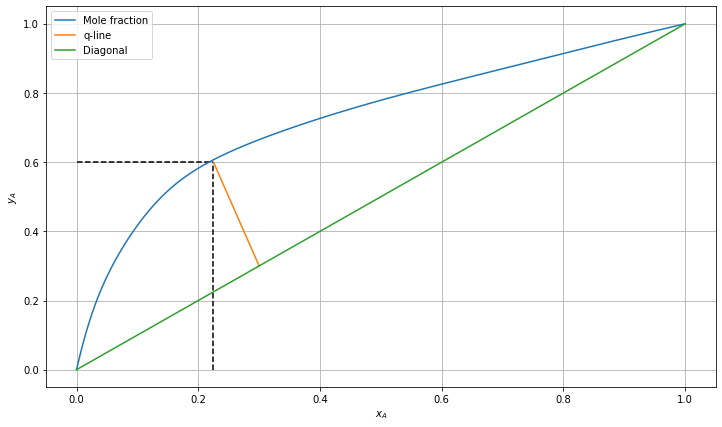

In [65]:
def qline(V,F,z,x):
    return (V/F-1)*F/V*x+F/V*z
plt.figure(figsize=(12,7))
plt.plot(interpTx(interpX(molFrac)),interpTy(interpX(molFrac)),label='Mole fraction')
plt.plot([.225,.3],qline(.2,1,.3,np.array([.225,.3])),label='q-line')
plt.plot([0,1],[0,1],label='Diagonal')
plt.hlines(qline(.2,1,.3,.225),0,.225,linestyles='--',color='k')
plt.vlines(.225,0,qline(.2,1,.3,.225),linestyles='--',color='k')
plt.xlabel(r'$x_A$')
plt.ylabel(r'$y_A$')
plt.grid()
plt.legend()

;
print(interpX(.46))

According to the above plot, $x_A \approx 0.24$ and $y_A \approx 0.60$ which would indicate that the temperature is about $74.0 \degree C$. These results are similar to those found with the inverse lever arm rule.